In [100]:
import talib.abstract as ta

In [101]:
import FinanceDataReader as fdr

In [102]:
# 이동평균선 등의 지표 NaN 값을 없애기 위해 Target 시작 연월의 앞전 6개월 전부터 데이터를 얻는다.
samsung_2019 = fdr.DataReader('005930','2018-6-01', '2019-12-31')
samsung_2019

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2018-06-01,50500,51700,49950,51300,13038499,0.011834
2018-06-04,50800,51200,50700,51100,9767171,-0.003899
2018-06-05,51100,51400,50400,51300,9144100,0.003914
2018-06-07,51800,51800,50500,50600,13590016,-0.013645
2018-06-08,50200,50400,49600,49650,16951706,-0.018775
...,...,...,...,...,...,...
2019-12-23,56100,56400,55100,55500,9839252,-0.008929
2019-12-24,55600,55700,54800,55000,11868463,-0.009009
2019-12-26,54700,55400,54400,55400,9645034,0.007273


In [103]:
# Talib 사용을 위해 컬럼명을 모두 소문자로 변환하는 코드(Talib은 컬럼명으로 소문자만 인식)
samsung_2019.columns = list(map(lambda x : x.lower(), samsung_2019.columns))
samsung_2019

,open,high,low,close,volume,change
Date,,,,,,
2018-06-01,50500,51700,49950,51300,13038499,0.011834
2018-06-04,50800,51200,50700,51100,9767171,-0.003899
2018-06-05,51100,51400,50400,51300,9144100,0.003914
2018-06-07,51800,51800,50500,50600,13590016,-0.013645
2018-06-08,50200,50400,49600,49650,16951706,-0.018775
...,...,...,...,...,...,...
2019-12-23,56100,56400,55100,55500,9839252,-0.008929
2019-12-24,55600,55700,54800,55000,11868463,-0.009009
2019-12-26,54700,55400,54400,55400,9645034,0.007273


In [104]:
# 기간별 삼성전자 종가 이동평균 계산
samsung_2019['ma5'] = ta.MA(samsung_2019, timeperiod=5)
samsung_2019['ma10'] = ta.MA(samsung_2019, timeperiod=10)
samsung_2019['ma20'] = ta.MA(samsung_2019, timeperiod=20)
samsung_2019['ma60'] = ta.MA(samsung_2019, timeperiod=60)
samsung_2019['ma120'] = ta.MA(samsung_2019, timeperiod=120)

In [21]:
# 민지 작성 수식
import matplotlib.pyplot as plt
# 볼린저밴드 수식 직접 # 볼린저밴드는 이동평균값 쁠마 표준편차 상위를 ubb/ 중간 mbb/ 하위 lbb
# x는 종가 series
# +- 2시그마 
def bb(x, w=20, k=2): # 20일 이동평균 k 는시그마 / 볼린저 밴드 넓이에 영향을 줌 
    """
    Calculate Bpllinger Bands
    ubb = MA_w(x) + k*sd(x)
    mbb = MA_w(x)
    lbb = MA_w(x) - k*sd(x)
    :param x:
    :return: (ubb,mbb,lbb)
    """
    
    x=pd.Series(x)
    mbb = x.rolling(w).mean()
    ubb = mbb + k * x.rolling(w).std()
    lbb = mbb - k * x.rolling(w).std()
    ubb.plot(x='Date', y='UBB')
    mbb.plot(x='Date', y='MBB')
    lbb.plot(x='Date', y='LBB')
    samsung_2019['close'].plot(color='pink', linewidth=1.5, linestyle=':')
    plt.show()

['Open', 'High', 'Low', 'Close', 'Volume', 'Change']

## Overlap Studies Functions
- BBANDS - Bollinger Bands
http://www.tadoc.org/indicator/BBANDS.htm
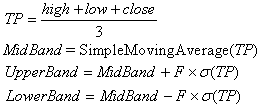

In [ ]:
upperband, middleband, lowerband = BBANDS(close, timeperiod=5, nbdevup=2, nbdevdn=2, matype=0)

In [110]:
# 볼린저 밴드
samsung_2019['upperband'], samsung_2019['middleband'], samsung_2019['lowerband'] = \
ta.BBANDS(samsung_2019.close, timeperiod=20)

In [111]:
# 얻고자하는 데이터의 시점부터 슬라이싱해서 기본 데이터를 얻는다.
samsung_2019_ = samsung_2019.loc['2019-01-01':,:]

In [112]:
samsung_2019_.head()

,open,high,low,close,volume,change,ma5,ma10,ma20,ma60,ma120,upperband,middleband,lowerband
Date,,,,,,,,,,,,,,
2019-01-02,39400,39400,38550,38750,7847664,0.001292,38570.0,38730.0,39772.5,42162.500000,44111.666667,42443.730990,39772.5,37101.269010
2019-01-03,38300,38550,37450,37600,12471493,-0.029677,38330.0,38575.0,39490.0,42044.166667,44050.833333,41801.190170,39490.0,37178.809830
2019-01-04,37450,37600,36850,37450,14108958,-0.003989,38150.0,38430.0,39255.0,41919.166667,43982.916667,41385.234729,39255.0,37124.765271
2019-01-07,38000,38900,37800,38750,12748997,0.034713,38250.0,38395.0,39120.0,41810.000000,43920.000000,41004.781154,39120.0,37235.218846
2019-01-08,38000,39200,37950,38100,12756554,-0.016774,38130.0,38340.0,39000.0,41726.666667,43854.166667,40822.635454,39000.0,37177.364546


In [116]:
samsung_2019_.to_csv('./data/samsung_2019.csv', sep=',', encoding='utf-8')

In [113]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

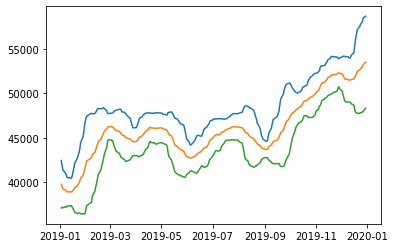

In [114]:
plt.figure()
plt.plot(samsung_2019_.index, samsung_2019_['upperband'])
plt.plot(samsung_2019_.index, samsung_2019_['middleband'])
plt.plot(samsung_2019_.index, samsung_2019_['lowerband'])

In [58]:
ta.BBANDS?

### SVD 로 분해해서, 대각행렬의 특이값 확인해보기

In [10]:
import numpy as np
import pandas as pd
from numpy.linalg import svd

In [11]:
samsung_2019_

,open,high,low,close,volume,change,ma5,ma10,ma20,ma60,ma120,upperband,middleband,lowerband
Date,,,,,,,,,,,,,,
2019-01-02,39400,39400,38550,38750,7847664,0.001292,38570.0,38730.0,39772.5,42162.500000,44111.666667,39019.888875,38570.0,38120.111125
2019-01-03,38300,38550,37450,37600,12471493,-0.029677,38330.0,38575.0,39490.0,42044.166667,44050.833333,39156.075057,38330.0,37503.924943
2019-01-04,37450,37600,36850,37450,14108958,-0.003989,38150.0,38430.0,39255.0,41919.166667,43982.916667,39232.589488,38150.0,37067.410512
2019-01-07,38000,38900,37800,38750,12748997,0.034713,38250.0,38395.0,39120.0,41810.000000,43920.000000,39438.276062,38250.0,37061.723938
2019-01-08,38000,39200,37950,38100,12756554,-0.016774,38130.0,38340.0,39000.0,41726.666667,43854.166667,39230.181803,38130.0,37029.818197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-23,56100,56400,55100,55500,9839252,-0.008929,56100.0,54660.0,52652.5,51485.000000,48560.416667,56889.936706,56100.0,55310.063294
2019-12-24,55600,55700,54800,55000,11868463,-0.009009,55760.0,55010.0,52812.5,51595.000000,48633.333333,56677.387595,55760.0,54842.612405
2019-12-26,54700,55400,54400,55400,9645034,0.007273,55580.0,55360.0,52972.5,51700.833333,48716.666667,56343.151361,55580.0,54816.848639


In [87]:
U, Sigma, Vt = svd(samsung_2019_)

In [88]:
Sigma

array([1.82547864e+08, 9.06678444e+05, 4.46506814e+04, 2.21400327e+04,
       1.39248760e+04, 1.09913892e+04, 9.62295625e+03, 6.15344176e+03,
       4.38276953e+03, 3.16293357e+03, 2.07441926e+03, 1.17288489e-01,
       2.14761038e-10, 1.22362249e-12])

In [89]:
np.round(Sigma)

array([1.82547864e+08, 9.06678000e+05, 4.46510000e+04, 2.21400000e+04,
       1.39250000e+04, 1.09910000e+04, 9.62300000e+03, 6.15300000e+03,
       4.38300000e+03, 3.16300000e+03, 2.07400000e+03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00])

In [90]:
# 정규화 진행하지 않은 데이터의 SVD 분해 결과
print('Sigma Value : \n', np.round(Sigma))

Sigma Value : 
 [1.82547864e+08 9.06678000e+05 4.46510000e+04 2.21400000e+04
 1.39250000e+04 1.09910000e+04 9.62300000e+03 6.15300000e+03
 4.38300000e+03 3.16300000e+03 2.07400000e+03 0.00000000e+00
 0.00000000e+00 0.00000000e+00]


### 원본데이터가 그대로 존재할때 볼린저밴드 데이터 피처들의 특이값이 0임은 확인할 수 있는데, 이것은 행렬 특성 추출에 위 컬럼들의 큰 의미가 없다는 것이다.
- 그 이유는 볼린저 밴드 값(upper, middle, lower)  자체가 원본 데이터를 기반으로 파생된 값이기 때문에, 차원 분해시 대각원소의 특이값이 0 이 나온다.
- 즉 해당 3가지 데이터를 이용한 band width 등의 새로운 피처 값을 생성하지 않는 이상, 이 값(upper, middle, lower) 을 피처로 사용하는 것은 중복된 피처를 사용하는 것과 같다. 

- 그래도 LSTM 으로 결과를 비교 예측해보자(차이가 없음을 눈으로 확인하기)

- Sigma 값 자체가 너무 크다. 정규화를 하고 진행해야겠다
- 어떤 정규화가 적절한지 논의하고 이것도 Fix하는 것이 좋겠다

In [79]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [74]:
scaler = StandardScaler()
samsung_2019_scaled = scaler.fit_transform(samsung_2019_)

In [76]:
samsung_2019_scaled.shape

(246, 14)

In [78]:
#StandardScaler로 정규화한 데이터의 SVD 분해 결과
U, Sigma, Vt = svd(samsung_2019_scaled)
print('Sigma Value : \n', np.round(Sigma,3))

Sigma Value : 
 [52.33  17.029 14.617 11.175  6.174  4.411  3.104  2.52   1.225  1.003
  0.837  0.531  0.     0.   ]


In [83]:
# MinMax Scaler 로 정규화한 데이터의 SVD 분해 결과
scaler = MinMaxScaler()
samsung_2019_scaled = scaler.fit_transform(samsung_2019_)

In [84]:
U, Sigma, Vt = svd(samsung_2019_scaled)
print('Sigma Value : \n', np.round(Sigma,3))

Sigma Value : 
 [27.916  4.838  2.752  2.456  1.526  1.013  0.647  0.519  0.256  0.234
  0.163  0.115  0.036  0.   ]


###  LSTM 으로 돌려서 w/, w/o 볼린저 밴드 피처 로 나누어서 유의미한 정확도 차이가 정말로 없는지 확인해볼 필요가 있다. 
- colab 으로 tensor 먼저 돌려보자

In [223]:
# 5일 이동평균선과 볼린저 밴드 수치 컬럼들 SVD 로 행렬분해해보기
bolinger_features = samsung_2019_[['lowerband','ma20','upperband','volume','middleband']]
bolinger_features

,lowerband,ma20,upperband,volume,middleband
Date,,,,,
2019-01-02,37101.269010,39772.5,42443.730990,7847664,39772.5
2019-01-03,37178.809830,39490.0,41801.190170,12471493,39490.0
2019-01-04,37124.765271,39255.0,41385.234729,14108958,39255.0
2019-01-07,37235.218846,39120.0,41004.781154,12748997,39120.0
2019-01-08,37177.364546,39000.0,40822.635454,12756554,39000.0
...,...,...,...,...,...
2019-12-23,47769.317124,52652.5,57535.682876,9839252,52652.5
2019-12-24,47842.603120,52812.5,57782.396880,11868463,52812.5
2019-12-26,47887.082121,52972.5,58057.917879,9645034,52972.5


In [219]:
U, Sigma, Vt = svd(bolinger_features)

In [220]:
np.round(Sigma)

array([1.82536516e+08, 4.54323000e+05, 2.02840000e+04, 0.00000000e+00])

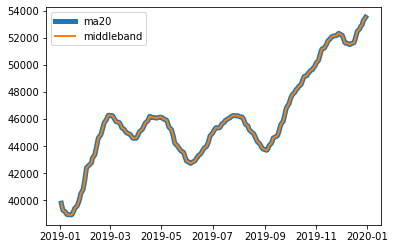

In [230]:
plt.figure()
plt.plot(bolinger_features.index, bolinger_features.ma20, linewidth=5, label='ma20')
plt.plot(bolinger_features.index, bolinger_features.middleband, linewidth=2, label='middleband')
plt.legend()

볼린저 밴드의 middle band 값 자체가 이동평균선(지정해주는 값에따라)과 동일하므로, 동일값을 갖는 피처가 중복으로 들어가게 됨

In [132]:
samsung_2019_

,open,high,low,close,volume,change,ma5,ma10,ma20,ma60,ma120,upperband,middleband,lowerband,bol_bandwidth
Date,,,,,,,,,,,,,,,
2019-01-02,39400,39400,38550,38750,7847664,0.001292,38570.0,38730.0,39772.5,42162.500000,44111.666667,42443.730990,39772.5,37101.269010,5342.461979
2019-01-03,38300,38550,37450,37600,12471493,-0.029677,38330.0,38575.0,39490.0,42044.166667,44050.833333,41801.190170,39490.0,37178.809830,4622.380339
2019-01-04,37450,37600,36850,37450,14108958,-0.003989,38150.0,38430.0,39255.0,41919.166667,43982.916667,41385.234729,39255.0,37124.765271,4260.469458
2019-01-07,38000,38900,37800,38750,12748997,0.034713,38250.0,38395.0,39120.0,41810.000000,43920.000000,41004.781154,39120.0,37235.218846,3769.562309
2019-01-08,38000,39200,37950,38100,12756554,-0.016774,38130.0,38340.0,39000.0,41726.666667,43854.166667,40822.635454,39000.0,37177.364546,3645.270909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-23,56100,56400,55100,55500,9839252,-0.008929,56100.0,54660.0,52652.5,51485.000000,48560.416667,57535.682876,52652.5,47769.317124,9766.365752
2019-12-24,55600,55700,54800,55000,11868463,-0.009009,55760.0,55010.0,52812.5,51595.000000,48633.333333,57782.396880,52812.5,47842.603120,9939.793760
2019-12-26,54700,55400,54400,55400,9645034,0.007273,55580.0,55360.0,52972.5,51700.833333,48716.666667,58057.917879,52972.5,47887.082121,10170.835757


In [135]:
samsung_2019_['upperband'] - samsung_2019_['lowerband']

Date
2019-01-02     5342.461979
2019-01-03     4622.380339
2019-01-04     4260.469458
2019-01-07     3769.562309
2019-01-08     3645.270909
                  ...     
2019-12-23     9766.365752
2019-12-24     9939.793760
2019-12-26    10170.835757
2019-12-27    10491.954060
2019-12-30    10356.886598
Length: 246, dtype: float64

In [137]:
samsung_2019['bandwidth']=(samsung_2019_['upperband'] - samsung_2019_['lowerband'])

In [139]:
samsung_2019

,open,high,low,close,volume,change,ma5,ma10,ma20,ma60,ma120,upperband,middleband,lowerband,bandwidth
Date,,,,,,,,,,,,,,,
2018-06-01,50500,51700,49950,51300,13038499,0.011834,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-04,50800,51200,50700,51100,9767171,-0.003899,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-05,51100,51400,50400,51300,9144100,0.003914,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-07,51800,51800,50500,50600,13590016,-0.013645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-08,50200,50400,49600,49650,16951706,-0.018775,50790.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-23,56100,56400,55100,55500,9839252,-0.008929,56100.0,54660.0,52652.5,51485.000000,48560.416667,57535.682876,52652.5,47769.317124,9766.365752
2019-12-24,55600,55700,54800,55000,11868463,-0.009009,55760.0,55010.0,52812.5,51595.000000,48633.333333,57782.396880,52812.5,47842.603120,9939.793760
2019-12-26,54700,55400,54400,55400,9645034,0.007273,55580.0,55360.0,52972.5,51700.833333,48716.666667,58057.917879,52972.5,47887.082121,10170.835757


In [140]:
samsung_2019_ = samsung_2019.loc['2019-01-01':,:]

In [159]:
samsung_2019_

,open,high,low,close,volume,change,ma5,ma10,ma20,ma60,ma120,upperband,middleband,lowerband,bandwidth
Date,,,,,,,,,,,,,,,
2019-01-02,39400,39400,38550,38750,7847664,0.001292,38570.0,38730.0,39772.5,42162.500000,44111.666667,42443.730990,39772.5,37101.269010,5342.461979
2019-01-03,38300,38550,37450,37600,12471493,-0.029677,38330.0,38575.0,39490.0,42044.166667,44050.833333,41801.190170,39490.0,37178.809830,4622.380339
2019-01-04,37450,37600,36850,37450,14108958,-0.003989,38150.0,38430.0,39255.0,41919.166667,43982.916667,41385.234729,39255.0,37124.765271,4260.469458
2019-01-07,38000,38900,37800,38750,12748997,0.034713,38250.0,38395.0,39120.0,41810.000000,43920.000000,41004.781154,39120.0,37235.218846,3769.562309
2019-01-08,38000,39200,37950,38100,12756554,-0.016774,38130.0,38340.0,39000.0,41726.666667,43854.166667,40822.635454,39000.0,37177.364546,3645.270909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-23,56100,56400,55100,55500,9839252,-0.008929,56100.0,54660.0,52652.5,51485.000000,48560.416667,57535.682876,52652.5,47769.317124,9766.365752
2019-12-24,55600,55700,54800,55000,11868463,-0.009009,55760.0,55010.0,52812.5,51595.000000,48633.333333,57782.396880,52812.5,47842.603120,9939.793760
2019-12-26,54700,55400,54400,55400,9645034,0.007273,55580.0,55360.0,52972.5,51700.833333,48716.666667,58057.917879,52972.5,47887.082121,10170.835757


In [143]:
samsung_2019_.columns

Index(['open', 'high', 'low', 'close', 'volume', 'change', 'ma5', 'ma10',
       'ma20', 'ma60', 'ma120', 'upperband', 'middleband', 'lowerband',
       'bandwidth'],
      dtype='object')

In [144]:
a = samsung_2019_[['open', 'high', 'low', 'close', 'volume', 'change', 'ma5', 'ma10',
       'ma20', 'ma60', 'ma120','bandwidth']]

In [189]:
a

,open,high,low,close,volume,change,ma5,ma10,ma20,ma60,ma120,bandwidth
Date,,,,,,,,,,,,
2019-01-02,39400,39400,38550,38750,7847664,0.001292,38570.0,38730.0,39772.5,42162.500000,44111.666667,5342.461979
2019-01-03,38300,38550,37450,37600,12471493,-0.029677,38330.0,38575.0,39490.0,42044.166667,44050.833333,4622.380339
2019-01-04,37450,37600,36850,37450,14108958,-0.003989,38150.0,38430.0,39255.0,41919.166667,43982.916667,4260.469458
2019-01-07,38000,38900,37800,38750,12748997,0.034713,38250.0,38395.0,39120.0,41810.000000,43920.000000,3769.562309
2019-01-08,38000,39200,37950,38100,12756554,-0.016774,38130.0,38340.0,39000.0,41726.666667,43854.166667,3645.270909
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-23,56100,56400,55100,55500,9839252,-0.008929,56100.0,54660.0,52652.5,51485.000000,48560.416667,9766.365752
2019-12-24,55600,55700,54800,55000,11868463,-0.009009,55760.0,55010.0,52812.5,51595.000000,48633.333333,9939.793760
2019-12-26,54700,55400,54400,55400,9645034,0.007273,55580.0,55360.0,52972.5,51700.833333,48716.666667,10170.835757


In [154]:
from sklearn.preprocessing import MinMaxScaler

In [155]:
# 정규화(Min/Max)
scaler = MinMaxScaler()
scaled_df  = scaler.fit_transform(a)

In [157]:
scaled_df.shape

(246, 12)

In [163]:
# 정규화(Min/Max)
scaler = MinMaxScaler()
scaled_df_tot  = scaler.fit_transform(samsung_2019_)
# 볼린저 밴드 각 원소 모두 를 컬럼화한후 대각원소(특이값) 확인
U, Sigma, Vt = svd(scaled_df_tot)
print('Sigma Value : \n', np.round(Sigma,3))

Sigma Value : 
 [28.597  5.371  3.418  2.637  2.392  1.794  1.116  0.484  0.359  0.216
  0.173  0.164  0.101  0.     0.   ]


- lowerband와 bandwidth 특이값 0 기록, 위 행렬 원소에 이미 있기 때문인듯

In [ ]:
# 정규화(Min/Max)
scaler = MinMaxScaler()
scaled_df_tot  = scaler.fit_transform(samsung_2019_)

In [166]:
scaled_df = pd.DataFrame(scaled_df_tot)

In [168]:
scaled_df.columns = samsung_2019_.columns

In [169]:
scaled_df

,open,high,low,close,volume,change,ma5,ma10,ma20,ma60,ma120,upperband,middleband,lowerband,bandwidth
0,0.099744,0.091371,0.088773,0.067532,0.138911,0.514712,0.024485,0.022350,0.059408,0.077629,0.171903,0.109522,0.059408,0.046684,0.405214
1,0.043478,0.048223,0.031332,0.007792,0.325565,0.134909,0.011130,0.013467,0.040062,0.066494,0.161358,0.074294,0.040062,0.052098,0.322042
2,0.000000,0.000000,0.000000,0.000000,0.391666,0.449943,0.001113,0.005158,0.023968,0.054732,0.149585,0.051490,0.023968,0.048324,0.280240
3,0.028133,0.065990,0.049608,0.067532,0.336768,0.924581,0.006678,0.003152,0.014724,0.044460,0.138678,0.030631,0.014724,0.056036,0.223538
4,0.028133,0.081218,0.057441,0.033766,0.337073,0.293152,0.000000,0.000000,0.006506,0.036619,0.127266,0.020645,0.006506,0.051997,0.209182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,0.953964,0.954315,0.953003,0.937662,0.219307,0.389369,1.000000,0.935244,0.941448,0.954834,0.943084,0.936937,0.941448,0.791557,0.916192
242,0.928389,0.918782,0.937337,0.911688,0.301222,0.388383,0.981080,0.955301,0.952405,0.965185,0.955724,0.950463,0.952405,0.796674,0.936223
243,0.882353,0.903553,0.916449,0.932468,0.211467,0.588059,0.971063,0.975358,0.963362,0.975143,0.970170,0.965569,0.963362,0.799780,0.962910
244,0.933504,0.979695,0.973890,0.989610,0.319170,0.742373,0.976628,0.993696,0.981168,0.987140,0.985338,0.988626,0.981168,0.806723,1.000000


In [171]:
# 볼린저 밴드의 (upper/middle/lower) 들어간 경우(bandwidth 제외)
U, Sigma, Vt = svd(scaled_df.iloc[:,:-1])
print('Sigma Value : \n', np.round(Sigma,3))

Sigma Value : 
 [28.12   4.926  2.638  2.447  2.189  1.12   1.048  0.474  0.247  0.205
  0.164  0.121  0.07   0.   ]


- middleband, lowerband 값은 이미 앞전 컬럼의 값들에서 파생할 수 있는 값이기 때문에 특이값이 0 에 가깝게 나왔다. -> 즉 덜 중요한 정보가 되버림

In [173]:
# 볼린저 밴드의 Upper/Middle/lower 를 제외하고, Upper-Lower 값을 Bandwidth로 지정해서 새로 컬럼 생성한 후 svd 분해해보기
U, Sigma, Vt = svd(scaled_df[['open', 'high', 'low', 'close', 'volume', 'change', 'ma5', 'ma10',
       'ma20', 'ma60', 'ma120','bandwidth']])
print('Sigma Value : \n', np.round(Sigma,3))

Sigma Value : 
 [24.928  5.126  3.182  2.629  2.302  1.428  1.004  0.44   0.24   0.199
  0.164  0.114]


- bandwidth로 지정해서 넣은 경우, 값이 제일 낮긴 하지만 0.1 정도의 수치를 보존하고 있다.

### 차원축소를 이용해보기
- MinMax 로 정규화된 볼린저 밴드를 이루는 3개의 컬럼을 압축해 1가지의 새로운 feature 로 생성
- 위의 bandwidth 방법과 비교해보기(svd 후 대각원소값 확인)

In [176]:
from sklearn.decomposition import PCA

In [181]:
bol_cols= scaled_df[['upperband', 'middleband','lowerband']]

In [177]:
pca = PCA(n_components=1)

In [182]:
pca.fit(bol_cols)

PCA(n_components=1)

In [183]:
# 3개 컬럼을 압축한 새로운 feature bol_pca 생성
bol_pca = pca.transform(bol_cols)

In [186]:
scaled_df['bolinger_pca']=bol_pca

In [191]:
scaled_df =scaled_df.set_index(a.index)

In [200]:
# bandwidth
U, Sigma, Vt = svd(scaled_df[['open', 'high', 'low', 'close', 'volume', 'change', 'ma5', 'ma10',
       'ma20', 'ma60', 'ma120','bandwidth']])
print('Sigma Value : \n', np.round(Sigma,3))

Sigma Value : 
 [24.928  5.126  3.182  2.629  2.302  1.428  1.004  0.44   0.24   0.199
  0.164  0.114]


In [201]:
# PCA 로 볼린저밴드 3컬럼을 1개의 새로운 피처로 압축한  bolinger_pca 
U, Sigma, Vt = svd(scaled_df[['open', 'high', 'low', 'close', 'volume', 'change', 'ma5', 'ma10',
       'ma20', 'ma60', 'ma120','bolinger_pca']])
print('Sigma Value : \n', np.round(Sigma,3))

Sigma Value : 
 [24.45   7.093  2.639  2.433  2.056  1.441  0.96   0.45   0.214  0.185
  0.164  0.104]


- bandwidth 와 PCA 압축은 비슷하다

In [211]:
# bandwidth
U, Sigma, Vt = svd(scaled_df[['close','ma20','bandwidth']])
print('Sigma Value : \n', np.round(Sigma,3))

Sigma Value : 
 [12.765  3.498  0.998]


In [212]:
# PCA
U, Sigma, Vt = svd(scaled_df[['close','ma20','bolinger_pca']])
print('Sigma Value : \n', np.round(Sigma,3))

Sigma Value : 
 [11.886  5.394  0.972]


In [209]:
df_corr = scaled_df.corr()

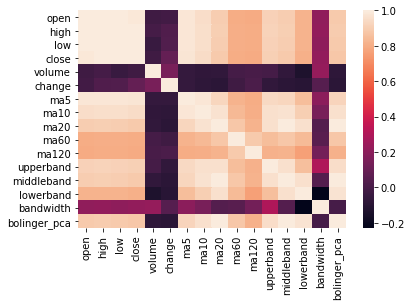

In [210]:
sns.heatmap(df_corr)